In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfr=pd.read_excel('datasets_140442_330428_Data_Train.xlsx')

In [3]:
dft=pd.read_excel('datasets_140442_330428_Test_set.xlsx')

In [4]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
dfr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

since only 2 missing values are present ,we will drop those two rows .

In [6]:
dfr.dropna(axis=0,inplace=True)

In [7]:
dfr.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
dfr.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


# Exploratory Data Analysis

In [9]:
dfr['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

since 80% of the values in Additional_info are 'no info' we decided to drop this column.

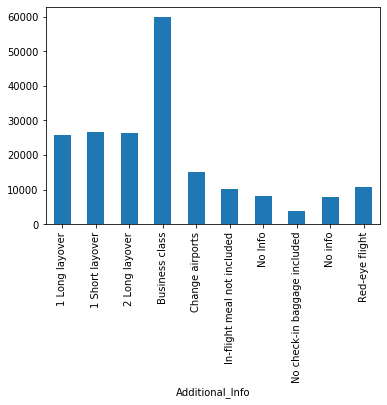

In [10]:
dfr.groupby('Additional_Info')['Price'].median().plot(kind='bar')

In [11]:
feature=[feature for feature in dfr.columns if dfr[feature].dtypes == 'object']

In [12]:
feature

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [13]:
features1=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']

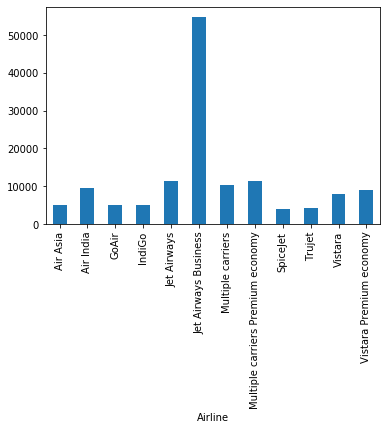

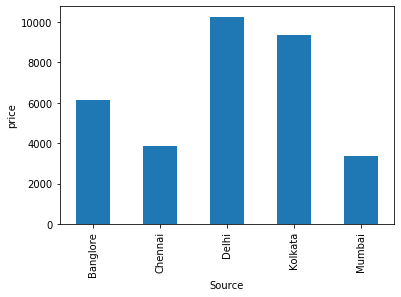

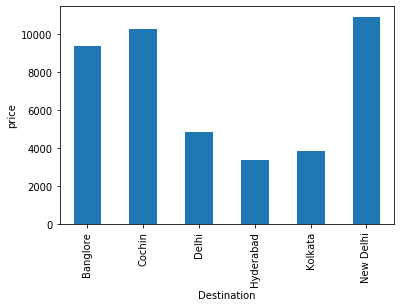

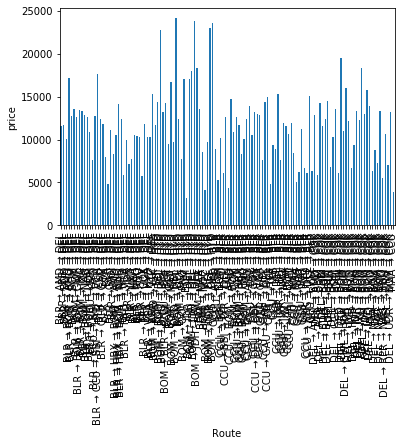

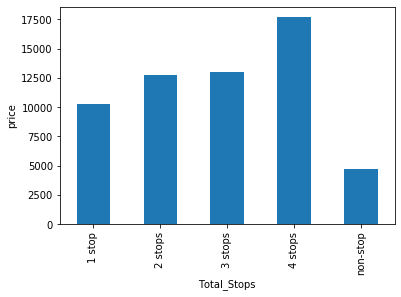

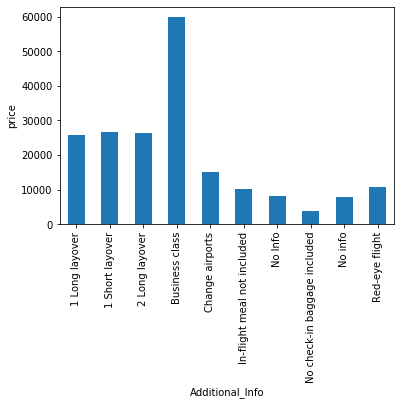

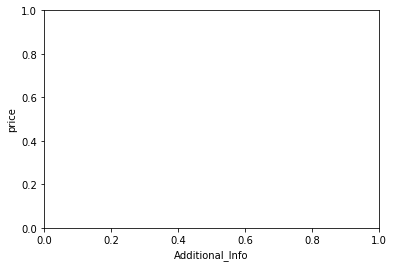

In [14]:
for feature in features1:
    data=dfr.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.show()
    plt.xlabel(feature)
    plt.ylabel('price')

-Looking at the graph between number of stops and our dependent variable Price ,we can see a sort of linear relationship.

-Comimg to the Airline plot as we can see ,apart from Jet Airways all the airlines have more or less same median,so this variable can be treated as nominal.

-On observing the plot between Addtional info and price,we can also see that some of the values have high median price as compared to others.

[Text(0, 0, 'non-stop'),
 Text(0, 0, '2 stops'),
 Text(0, 0, '1 stop'),
 Text(0, 0, '3 stops'),
 Text(0, 0, '4 stops')]

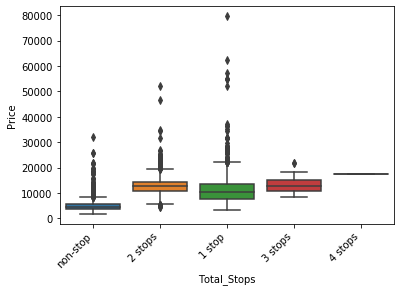

In [15]:
plot=sns.boxplot(x='Total_Stops',y='Price',data=dfr)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

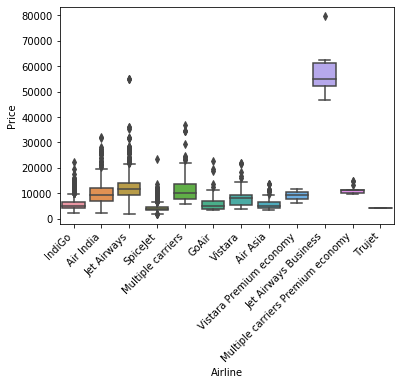

In [16]:
plot=sns.boxplot(x='Airline',y='Price',data=dfr)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')



# Feature Engineering

In [17]:
dfr.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Extracting month,date and weekday from the Date of journey column

In [18]:
dfr["Journey_day"] = pd.to_datetime(dfr['Date_of_Journey'], format="%d/%m/%Y").dt.day
dfr["Journey_month"] = pd.to_datetime(dfr["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [19]:
dfr["Journey_weekday"] = pd.to_datetime(dfr["Date_of_Journey"], format = "%d/%m/%Y").dt.weekday

In [20]:
dfr.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,1
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,5
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,5
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,4
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,9,5,3


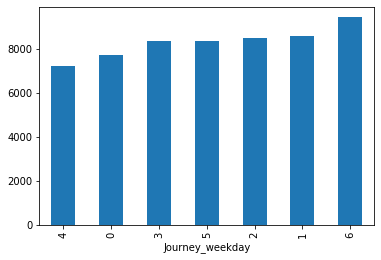

In [21]:
dfr.groupby('Journey_weekday')['Price'].median().sort_values().plot(kind='bar')

All the weekdays seems to have same median price .

In [22]:
dfr.drop('Date_of_Journey',inplace=True,axis=1)

Extracting Departure hour and minute from Dep_Time column

In [23]:
dfr["Dep_hour"] = pd.to_datetime(dfr["Dep_Time"]).dt.hour
dfr["Dep_min"] = pd.to_datetime(dfr["Dep_Time"]).dt.minute
dfr.drop(["Dep_Time"], axis = 1, inplace = True)

In [24]:
dfr.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50


Arrival Time ,Duration and Dep_time are correlated and one varibale can easily be derived from the other two,hence we decided to drop Arrival time

In [25]:
# Assigning and converting Duration column into list
duration = list(dfr["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
    
# Adding duration_hours and duration_mins list to train_data dataframe

dfr["Duration_hours"] = duration_hours
dfr["Duration_mins"] = duration_mins

In [26]:
dfr.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,6,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,4,16,50,4,45


In [27]:
dfr.drop(["Duration"], axis = 1, inplace = True)

In [28]:
dfr.drop('Arrival_Time',axis=1,inplace=True)

In [29]:
dfr.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,6,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,16,50,4,45


# Handling Categorical Columns

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

Routes and Number of stops convey the same meaning .that is about the number of stops between journey, hence we decided to drop the route column.

In [30]:
dfr.drop(['Route','Additional_Info'],axis=1,inplace=True)

As we discussed in the EDA part ,that price is directly proportional to number of stops ,
hence we can't use onehotencoding and will do manual encoding.

In [31]:
dfr.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
dfr.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50,4,45


We decided to perform onehotencoding for all the remaining columns .

In [33]:
Airline = dfr[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

Source = dfr[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)

Destination = dfr[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

dfr1 = pd.concat([dfr, Airline, Source, Destination], axis = 1)

In [34]:
dfr1.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50,...,0,0,0,0,0,0,0,0,0,1


In [35]:
dfr1.drop(['Airline', "Source", "Destination"], axis = 1, inplace = True)

In [36]:
dfr1.shape

(10682, 29)

In [37]:
dfr1.head()

,Total_Stops,Price,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,6,22,20,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2,5,50,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,6,9,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,6,18,5,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,4,16,50,4,45,0,...,0,0,0,0,0,0,0,0,0,1


# Feature Selection

In [38]:
X=dfr1.drop('Price',axis=1)
Y=dfr1['Price']

In [39]:
X.head()

,Total_Stops,Journey_day,Journey_month,Journey_weekday,Dep_hour,Dep_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,6,22,20,2,50,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2,5,50,7,25,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,6,9,25,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,6,18,5,5,25,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,4,16,50,4,45,0,0,...,0,0,0,0,0,0,0,0,0,1


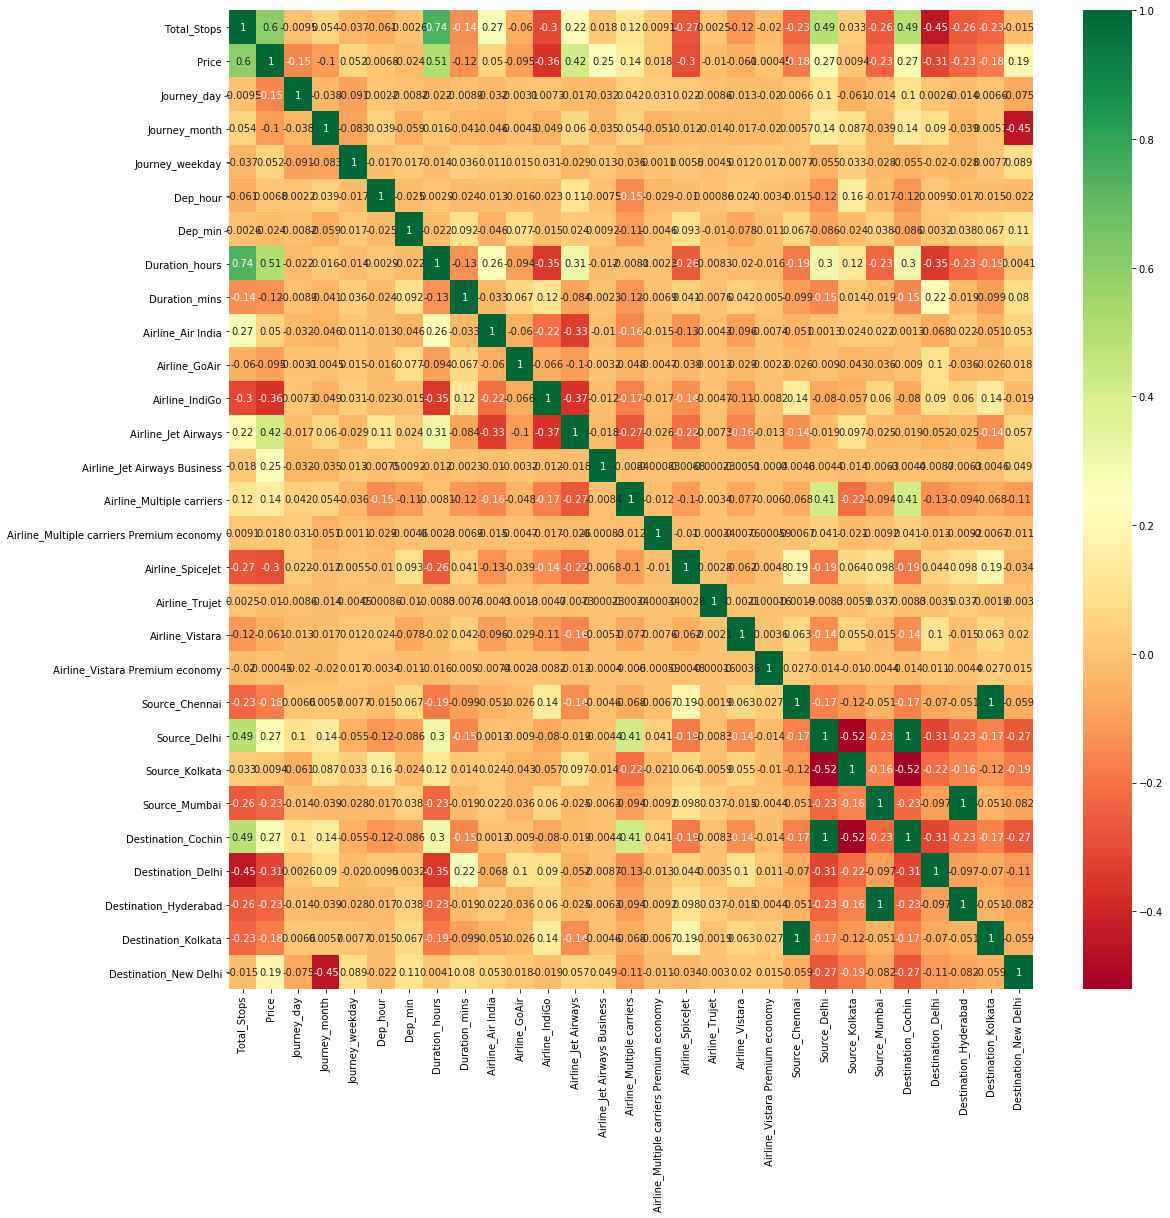

In [40]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(dfr1.corr(), annot = True, cmap = "RdYlGn")

plt.show()


In [41]:
def correlation(dataset, threshold):
    col_corr = set()  # Set storing  all the names of correlated columns having corr more than threshold
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: ####corr value can also be negative so taking abs value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
correlation(dfr1,0.8)

{'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata'}

Above are the columns which seems to be highly corrleated with each other and have pearson correlation value more than 0.8

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)
print(selection.feature_importances_)


[2.10600866e-01 1.15300478e-01 5.15619992e-02 2.92436945e-02
 4.07768024e-02 3.07687139e-02 1.50644269e-01 2.87597894e-02
 1.06653507e-02 2.00777761e-03 1.90193404e-02 1.39351031e-01
 6.74533285e-02 1.88623455e-02 8.80946707e-04 2.83795561e-03
 1.23340563e-04 4.98914153e-03 1.15809165e-04 5.02026868e-04
 1.43002197e-02 3.43392495e-03 5.79492990e-03 7.46145846e-03
 1.09573784e-02 8.26429019e-03 7.30811066e-04 2.45919806e-02]


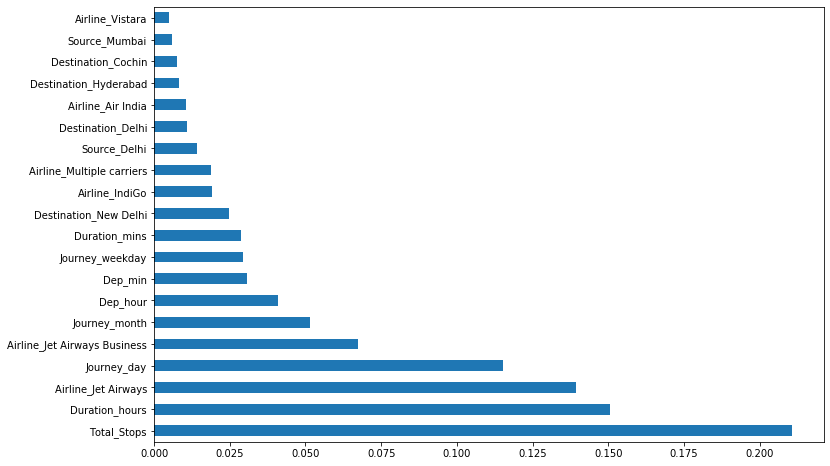

In [44]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

As we can see from the graph above there are many columns which seems to have less correlation with our dependent variable Price,
we will try dropping some of them and see how it affects our model.

# Fitting model using different regressor algorithms

1-Split dataset into train and test set in order to prediction w.r.t X_test

2-If needed do scaling of data

3-Scaling is not necessary in Random forest and decision tree

4-Import model

5-Fit the data

6-Predict w.r.t X_test

7-In regression check RSME Score

8-Plot graph

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score

In [47]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)
y_pred_dt = decision_regressor.predict(X_test)

In [48]:
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1444.3030260489782
Mean Squared Error (MSE): 6652469.623512193
Root Mean Squared Error (RMSE): 2579.238186657485


In [49]:
decision_regressor.score(X_train, y_train)

0.9711947003745914

In [50]:
decision_regressor.score(X_test, y_test)

0.7164718912739605

In [51]:
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)
y_pred_rf = random_regressor.predict(X_test)

In [52]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_rf)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_rf)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_rf))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 1249.218293177667
Mean Squared Error (MSE): 4595989.13086025
Root Mean Squared Error (RMSE): 2143.8258163526834


In [53]:
random_regressor.score(X_train, y_train)

0.9539559172307202

In [54]:
random_regressor.score(X_test, y_test)

0.8041190445436008

Using adaboost on random forest and see if it increases the score

In [55]:
adb_regressor = AdaBoostRegressor(base_estimator=random_regressor, n_estimators=100)
adb_regressor.fit(X_train, y_train)
y_pred_adb = adb_regressor.predict(X_test)

In [56]:
adb_regressor.score(X_test, y_test)

0.7586201564749913

In [57]:
adb_regressor.score(X_train, y_train)

0.8508972863619635

Dist plot between y_test and y_pred(obtained through random forest model)

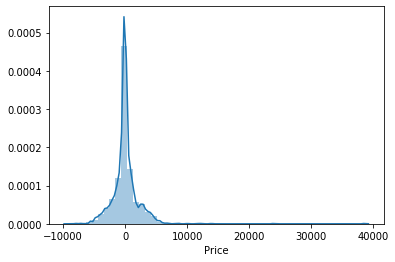

In [58]:
sns.distplot(y_test-y_pred_rf)
plt.show()

scatterplot

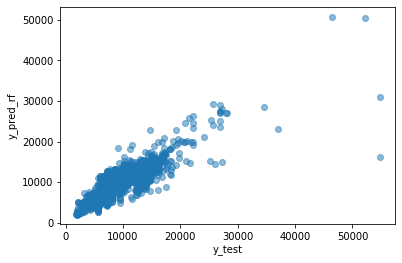

In [59]:
plt.scatter(y_test, y_pred_rf, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred_rf")
plt.show()


# Hyper Parameter Tuning 

1- Choose following method for hyperparameter tuning

2- RandomizedSearchCV --> Fast as compared to gridsearchcv

3-Assign hyperparameters in form of dictionery

4- Fit the model

5-Check best paramters and best score

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [63]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = random_regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=0, n_jobs = 1)

In [64]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=  10.9s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=  11.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=  12.6s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=  11.7s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, total=  11.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=30, total=  12.1s
[CV] n_estimators=400, min_samples_split=

[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.4s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.5s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   3.5s
[CV] n_estimators=500, min_samples_split=10

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [65]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [66]:
prediction = rf_random.predict(X_test)

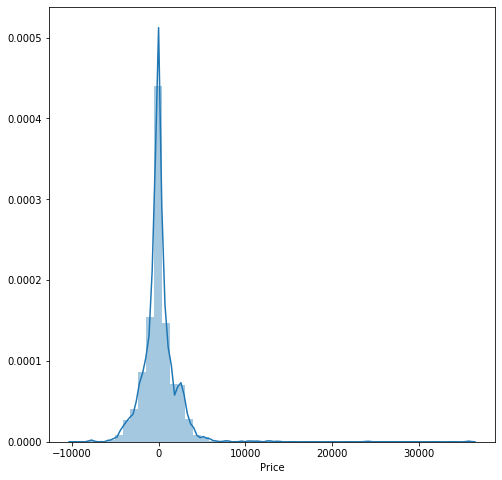

In [67]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()


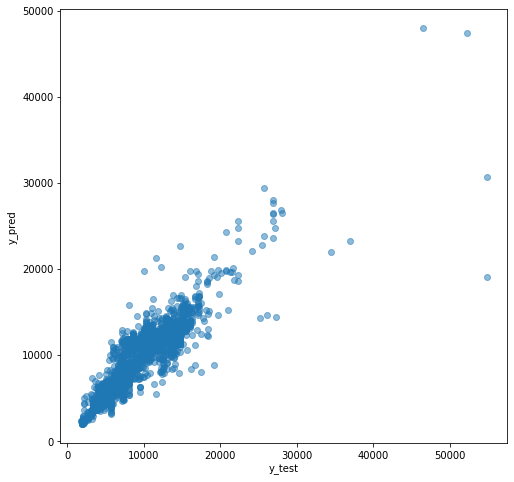

In [68]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [69]:
print("---- Random Forest Regression (after tuning)- Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, prediction)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, prediction)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, prediction))))

---- Random Forest Regression (after tuning)- Model Evaluation ----
Mean Absolute Error (MAE): 1213.776411108571
Mean Squared Error (MSE): 4189481.9820484915
Root Mean Squared Error (RMSE): 2046.8224109698651


In [70]:
metrics.r2_score(y_test, prediction)

0.8214443702660748

as observed we obtained better r2 score than simple random forest model

# Save the model to reuse it again

In [75]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)


In [77]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [78]:
y_prediction = forest.predict(X_test)

metrics.r2_score(y_test, y_prediction)

0.8214443702660748